In [111]:
print('SLEEP DIARY')

SLEEP DIARY


In [49]:
print('Inserire il nome del file excel contenente i dati:')
n=input()

Inserire il nome del file excel contenente i dati:
Sleep dataset 2020.xlsx


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
#import seaborn as sns
print(dir(datetime))
dati=pd.read_excel(n)
dati.drop(0,inplace=True)
dati.head()


['__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 'astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']


,Data,Ieri ha fatto un sonnellino di durata (minuti totali)?,A che ora è andato a letto ieri sera?,A che ora ha spento la luce per dormire?,"Dallo spegnimento della luce, in quanto tempo si è addormentato?",Orario previsto del risveglio questa mattina?,Qual è stato l'orario del risveglio finale questa mattina?,A che ora si è alzato dal letto?,Quante volte si è svegliato/a durante la notte? (0 se non si è svegliato/a),Quanti minuti in totale è rimasto/a sveglio/a nel corso della notte?,"Quanto è stato disturbato il suo sonno la notte scorsa? (1=per niente, 10=moltissimo)","Qualità del sonno la scorsa notte (1=molto scarso, 10=molto buono)","Livello di affaticamento di ieri (1=niente, 10=estremamente stancante)","Livello di sonnolenza di ieri (1=per niente, 10=estremamente sonnolento)",(polar)\nDaily activity goal,(polar)\nActual sleep,(polar)\nSleep continuity
1,2020-01-01 00:00:00,90,01:05:00,01:08:00,5,08:30:00,08:12:00,08:12:00,4,20,6,5,4,2,0.73,0.90,1.6
2,2020-01-02 00:00:00,0,23:02:00,23:51:00,5,07:30:00,07:30:00,07:30:00,0,0,1,7,2,1,0.90,0.96,4.8
3,2020-01-03 00:00:00,0,00:28:00,00:45:00,4,07:00:00,07:50:00,07:55:00,2,2,1,7,3,2,0.81,0.93,2.7
4,2020-01-04 00:00:00,0,22:55:00,00:03:00,10,06:00:00,06:00:00,06:00:00,0,0,1,7,6,1,1.99,0.93,2.8
5,2020-01-05 00:00:00,0,23:00:00,23:29:00,4,07:00:00,07:00:00,07:00:00,3,15,5,5,6,3,0.96,0.93,2.6


1      01:05:00
2      23:02:00
3      00:28:00
4      22:55:00
5      23:00:00
         ...   
362    22:45:00
363    22:33:00
364    22:36:00
365    22:40:00
366    22:41:00
Name: A che ora è andato a letto ieri sera?, Length: 366, dtype: object


ValueError: Illegal format string "1      01:05:00
2      23:02:00
3      00:28:00
4      22:55:00
5      23:00:00
         ...   
362    22:45:00
363    22:33:00
364    22:36:00
365    22:40:00
366    22:41:00
Name: A che ora è andato a letto ieri sera?, Length: 366, dtype: object"; two linestyle symbols

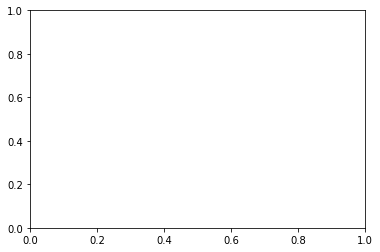

In [127]:
x=np.arange(0,dati.shape[0],1)
y=np.array(str(dati.iloc[:,2]))
y=np.flip(y)
print(y)
plt.plot(x,y,color='red')